In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import missingno as msno
matplotlib.rcParams["figure.figsize"]=(20,10)
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import chi2_contingency
from itertools import combinations
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score,recall_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("weatherAUS - weatherAUS.csv")

In [4]:
df.shape

(36881, 23)

<AxesSubplot:>

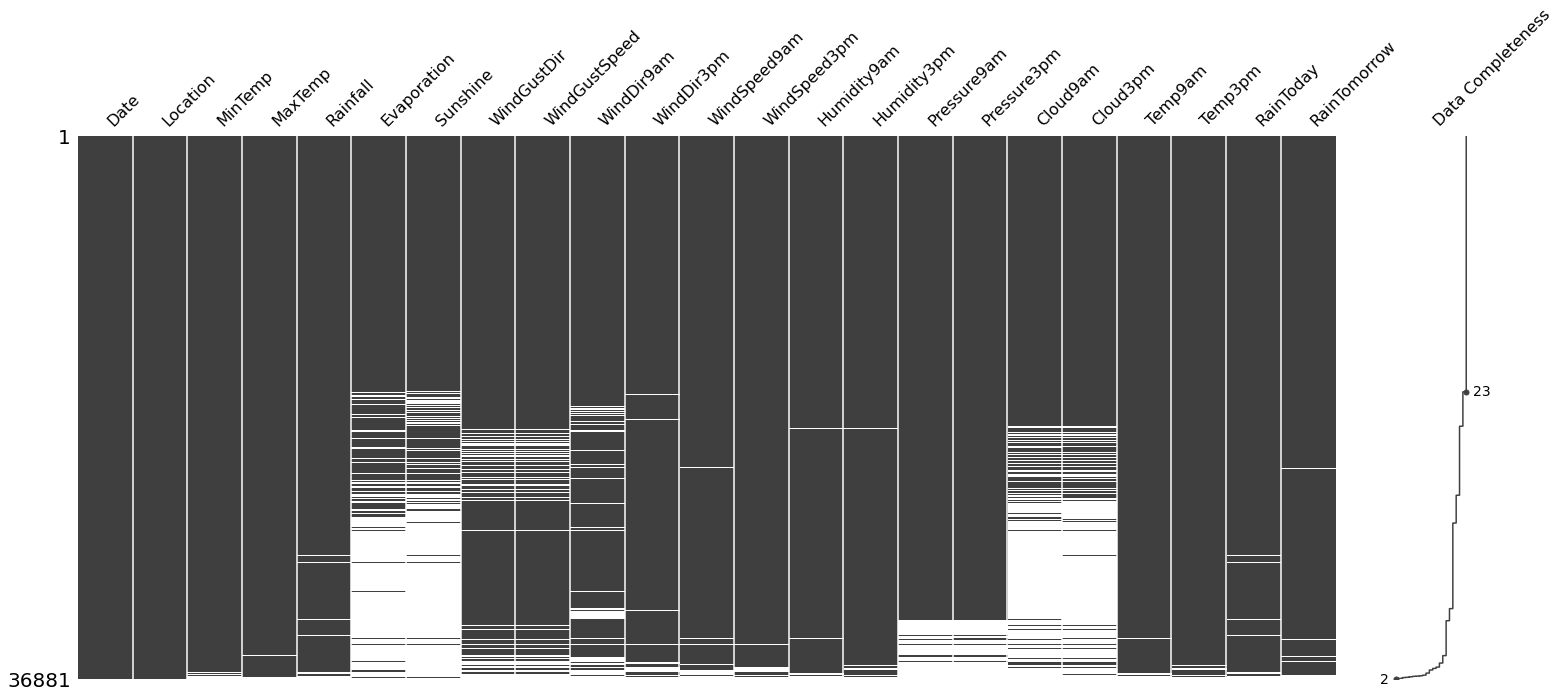

In [5]:
#visualizing portion missing values in the dataset
msno.matrix(df, labels=True, sort="descending")

<AxesSubplot:>

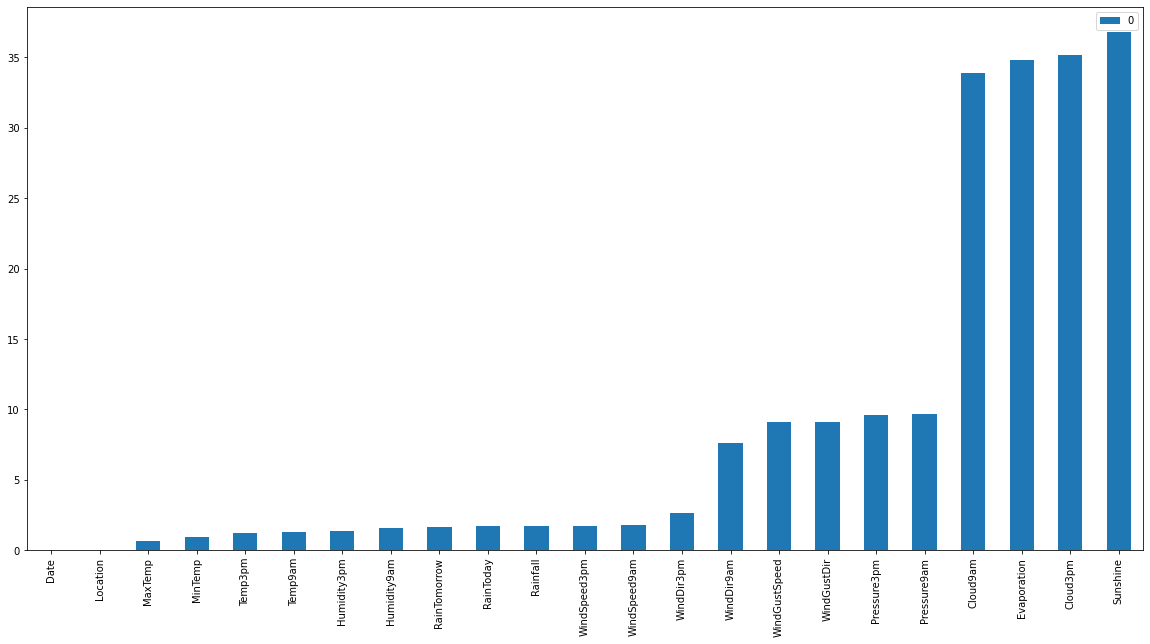

In [6]:
#checking which columns has what percentage of missing values
pd.DataFrame((df.isnull().sum()/len(df)*100).sort_values()).plot.bar()

In [7]:
#dropping columns with more than 30% missing values
df1=df.drop(['Sunshine','Cloud9am', 'Cloud3pm','Evaporation'],axis=1)

In [8]:
#dropping rows with 9 or more missing values
df2=df1.dropna(0,thresh=9)

In [9]:
#dropping rows with missing target labels
df3=df2.loc[df2["RainTomorrow"].dropna().index]

# Analysis

<AxesSubplot:>

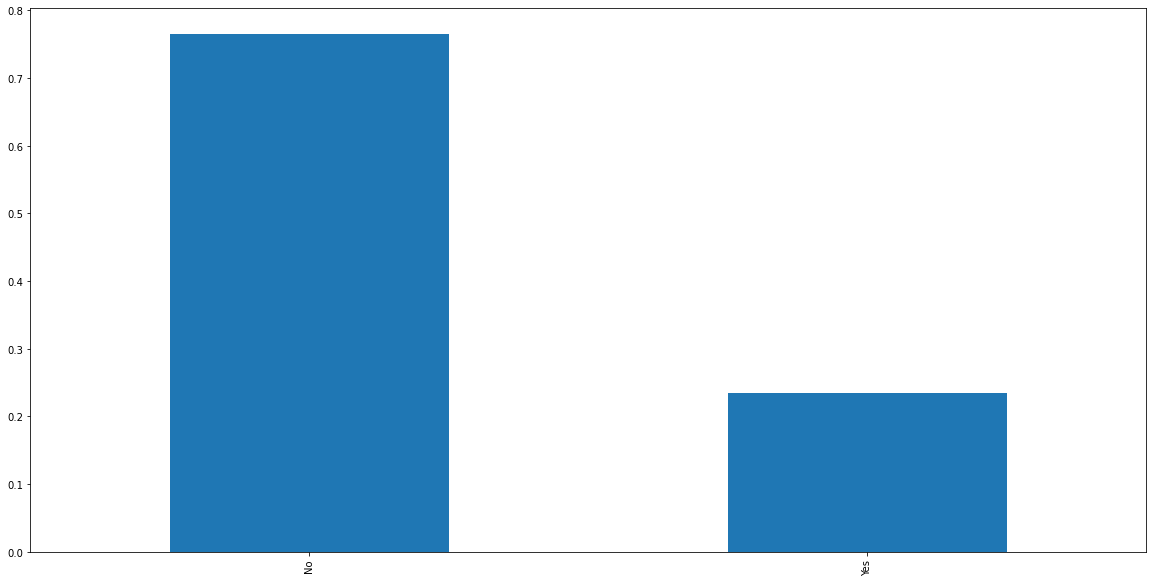

In [10]:
df3.RainTomorrow.value_counts(normalize=True).plot.bar()

This is an imbalanced dataset

<AxesSubplot:>

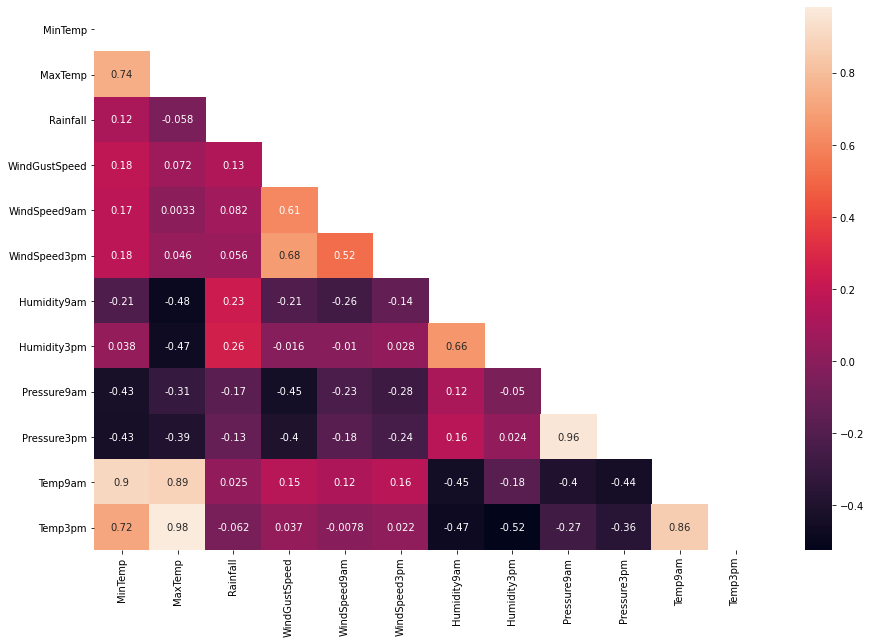

In [11]:
#correlation matrix
corr=df3.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(15,10))
sns.heatmap(corr,mask=mask,annot=True)

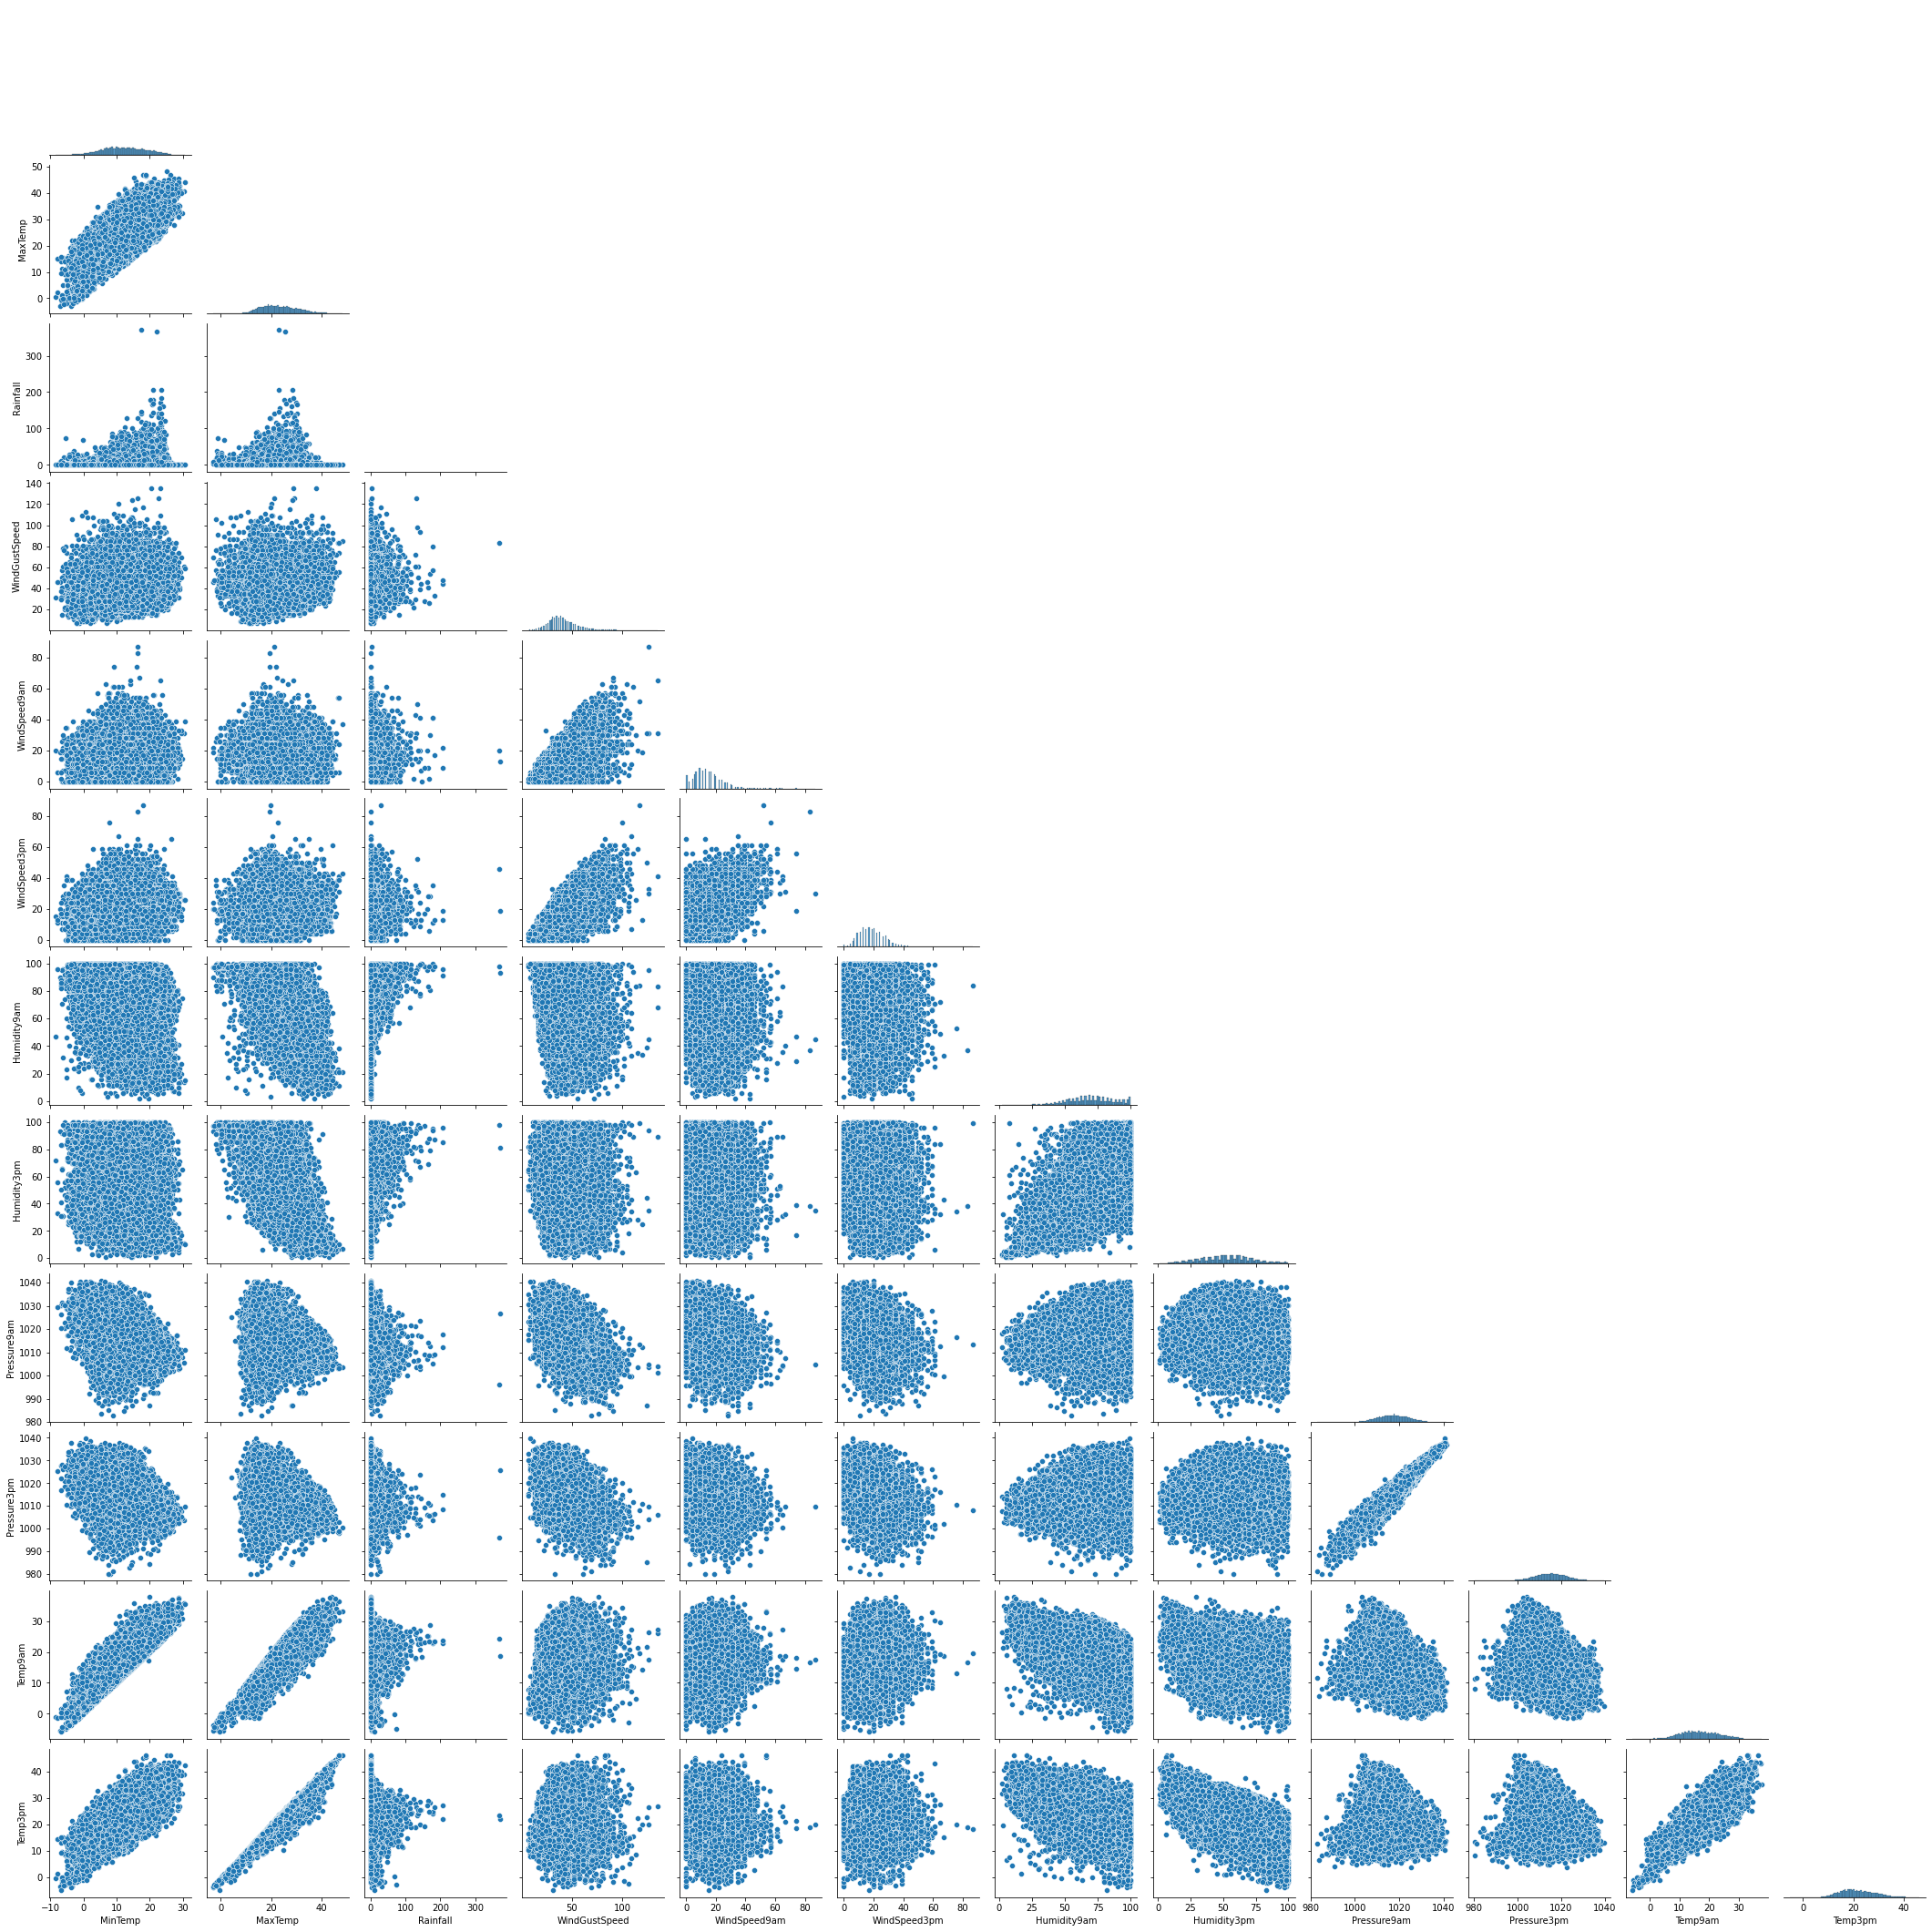

In [12]:
sns.pairplot(df3,corner=True)

In [13]:
df3=df3.reset_index()

In [14]:
df3=df3.drop(["Date","index"],axis=1)

In [15]:
df3.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [16]:
df3

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Hobart,5.1,14.3,0.0,NW,30.0,WSW,SSE,7.0,6.0,65.0,47.0,1023.1,1022.2,9.1,13.3,No,No
1,Launceston,1.1,14.5,0.4,SSW,50.0,E,SW,7.0,24.0,99.0,46.0,1001.5,1002.4,1.3,13.7,No,No
2,Williamtown,19.7,26.2,0.0,SSE,41.0,SSE,SSE,19.0,31.0,48.0,50.0,1020.9,1021.9,22.7,24.4,No,No
3,PerthAirport,16.6,28.0,0.0,SW,54.0,SSE,SW,28.0,33.0,50.0,41.0,1018.3,1014.9,20.0,26.1,No,No
4,GoldCoast,14.6,25.3,0.0,NNW,43.0,WNW,N,6.0,28.0,64.0,67.0,1020.3,1015.0,22.2,22.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36181,Perth,10.1,14.2,7.4,NNE,46.0,NNE,N,19.0,15.0,84.0,81.0,1016.2,1014.5,10.4,13.9,Yes,Yes
36182,PerthAirport,6.3,26.0,0.0,W,37.0,N,WSW,9.0,26.0,38.0,45.0,1024.2,1021.5,18.4,23.5,No,No
36183,Darwin,20.5,31.7,0.0,E,37.0,E,ESE,20.0,13.0,54.0,39.0,1012.6,1009.0,25.7,30.5,No,No
36184,Perth,6.3,23.3,0.0,SSW,39.0,E,SSW,9.0,20.0,50.0,41.0,1023.9,1019.9,16.4,20.9,No,No


In [17]:
#continuous variables
cont=['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',  'WindSpeed9am','WindSpeed3pm', 'Humidity9am',
      'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm']

In [18]:
#combinations of columns having continuous variables taken 2 at a time
c=list(combinations(cont,2))

In [19]:
#dropping rows with missing values to check association between the columns
df4=df3.dropna()

In [20]:
from sklearn.preprocessing import MinMaxScaler
s=df4[cont]
scaled=pd.DataFrame(MinMaxScaler().fit_transform(s),columns=cont)
scaled

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
0,0.320856,0.231818,0.000000,0.193277,0.058824,0.047059,0.642857,0.464646,0.691910,0.707071,0.262887,0.226415
1,0.213904,0.236364,0.001088,0.361345,0.058824,0.258824,0.989796,0.454545,0.320138,0.373737,0.061856,0.235849
2,0.711230,0.502273,0.000000,0.285714,0.200000,0.341176,0.469388,0.494949,0.654045,0.702020,0.613402,0.488208
3,0.628342,0.543182,0.000000,0.394958,0.305882,0.364706,0.489796,0.404040,0.609294,0.584175,0.543814,0.528302
4,0.574866,0.481818,0.000000,0.302521,0.047059,0.305882,0.632653,0.666667,0.643718,0.585859,0.600515,0.445755
...,...,...,...,...,...,...,...,...,...,...,...,...
28811,0.454545,0.229545,0.020131,0.327731,0.200000,0.152941,0.836735,0.808081,0.573150,0.577441,0.296392,0.240566
28812,0.352941,0.497727,0.000000,0.252101,0.082353,0.282353,0.367347,0.444444,0.710843,0.695286,0.502577,0.466981
28813,0.732620,0.627273,0.000000,0.252101,0.211765,0.129412,0.530612,0.383838,0.511188,0.484848,0.690722,0.632075
28814,0.352941,0.436364,0.000000,0.268908,0.082353,0.211765,0.489796,0.404040,0.705680,0.668350,0.451031,0.405660


In [21]:
#checking the associations between the columns by fitting 2 columns to a DecisionTreeREgressor.The metric used here is r2
score_d={}
for i in c:
    dt=DecisionTreeRegressor()
    X=scaled[i[0]].values.reshape(-1,1)
    y=scaled[i[1]].values.reshape(-1,1)
    score=cross_val_score(dt,X,y,cv=6,scoring="r2").mean()
    score_d[i]=score

In [22]:
score_d

{('MinTemp', 'MaxTemp'): 0.555995433878352,
 ('MinTemp', 'Rainfall'): 0.019297371455131756,
 ('MinTemp', 'WindGustSpeed'): 0.02970390344745148,
 ('MinTemp', 'WindSpeed9am'): 0.028487185029492452,
 ('MinTemp', 'WindSpeed3pm'): 0.014267913335703578,
 ('MinTemp', 'Humidity9am'): 0.04311745436267208,
 ('MinTemp', 'Humidity3pm'): -0.0030832645842228668,
 ('MinTemp', 'Pressure9am'): 0.16385092298903509,
 ('MinTemp', 'Pressure3pm'): 0.17576268966605227,
 ('MinTemp', 'Temp9am'): 0.8163539963365247,
 ('MinTemp', 'Temp3pm'): 0.5177364880283889,
 ('MaxTemp', 'Rainfall'): -0.005674197290167493,
 ('MaxTemp', 'WindGustSpeed'): -0.0018821736469455952,
 ('MaxTemp', 'WindSpeed9am'): -0.015029377753815557,
 ('MaxTemp', 'WindSpeed3pm'): -0.017958448405571554,
 ('MaxTemp', 'Humidity9am'): 0.25424591560510307,
 ('MaxTemp', 'Humidity3pm'): 0.2319074124479681,
 ('MaxTemp', 'Pressure9am'): 0.09288359932747409,
 ('MaxTemp', 'Pressure3pm'): 0.15595235899091195,
 ('MaxTemp', 'Temp9am'): 0.7935760060741504,
 ('Ma

In [23]:
#checking same with knn regressor
score_d={}
for i in c:
    dt=KNeighborsRegressor()
    X=scaled[i[0]].values.reshape(-1,1)
    y=scaled[i[1]].values.reshape(-1,1)
    score=cross_val_score(dt,X,y,cv=6,scoring="r2").mean()
    score_d[i]=score

In [24]:
score_d

{('MinTemp', 'MaxTemp'): 0.4769379851825104,
 ('MinTemp', 'Rainfall'): -0.15382427441374,
 ('MinTemp', 'WindGustSpeed'): -0.14538370167211748,
 ('MinTemp', 'WindSpeed9am'): -0.1598267664394101,
 ('MinTemp', 'WindSpeed3pm'): -0.1414022198313087,
 ('MinTemp', 'Humidity9am'): -0.1171111410306485,
 ('MinTemp', 'Humidity3pm'): -0.1904498777720567,
 ('MinTemp', 'Pressure9am'): 0.008834335039032581,
 ('MinTemp', 'Pressure3pm'): 0.02560523805177728,
 ('MinTemp', 'Temp9am'): 0.7825713657995849,
 ('MinTemp', 'Temp3pm'): 0.42817490244690654,
 ('MaxTemp', 'Rainfall'): -0.2201576154858106,
 ('MaxTemp', 'WindGustSpeed'): -0.1823224288327191,
 ('MaxTemp', 'WindSpeed9am'): -0.18518902354706004,
 ('MaxTemp', 'WindSpeed3pm'): -0.19109044512642073,
 ('MaxTemp', 'Humidity9am'): 0.12025227253280292,
 ('MaxTemp', 'Humidity3pm'): 0.07113569830054357,
 ('MaxTemp', 'Pressure9am'): -0.07161214327413146,
 ('MaxTemp', 'Pressure3pm'): 0.0008968392899891819,
 ('MaxTemp', 'Temp9am'): 0.75376162588292,
 ('MaxTemp', '

In [25]:
df3.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [26]:
#replacing highly correlated columns with their mean
df3["Temp"]=df3[['MinTemp', 'MaxTemp','Temp9am', 'Temp3pm']].mean(axis=1)

In [27]:
df3["Pressure"]=df3[['Pressure9am', 'Pressure3pm']].mean(axis=1)

In [28]:
df3.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Temp,Pressure
0,Hobart,5.1,14.3,0.0,NW,30.0,WSW,SSE,7.0,6.0,65.0,47.0,1023.1,1022.2,9.1,13.3,No,No,10.450,1022.65
1,Launceston,1.1,14.5,0.4,SSW,50.0,E,SW,7.0,24.0,99.0,46.0,1001.5,1002.4,1.3,13.7,No,No,7.650,1001.95
2,Williamtown,19.7,26.2,0.0,SSE,41.0,SSE,SSE,19.0,31.0,48.0,50.0,1020.9,1021.9,22.7,24.4,No,No,23.250,1021.40
3,PerthAirport,16.6,28.0,0.0,SW,54.0,SSE,SW,28.0,33.0,50.0,41.0,1018.3,1014.9,20.0,26.1,No,No,22.675,1016.60
4,GoldCoast,14.6,25.3,0.0,NNW,43.0,WNW,N,6.0,28.0,64.0,67.0,1020.3,1015.0,22.2,22.6,No,No,21.175,1017.65


In [29]:
df5=df3.drop(['MinTemp', 'MaxTemp','Temp9am', 'Temp3pm','Pressure9am', 'Pressure3pm'],axis=1)

In [30]:
df5.shape

(36186, 14)

In [31]:
df5.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,Temp,Pressure
0,Hobart,0.0,NW,30.0,WSW,SSE,7.0,6.0,65.0,47.0,No,No,10.450,1022.65
1,Launceston,0.4,SSW,50.0,E,SW,7.0,24.0,99.0,46.0,No,No,7.650,1001.95
2,Williamtown,0.0,SSE,41.0,SSE,SSE,19.0,31.0,48.0,50.0,No,No,23.250,1021.40
3,PerthAirport,0.0,SW,54.0,SSE,SW,28.0,33.0,50.0,41.0,No,No,22.675,1016.60
4,GoldCoast,0.0,NNW,43.0,WNW,N,6.0,28.0,64.0,67.0,No,No,21.175,1017.65


In [32]:
df5.isna().sum()

Location            0
Rainfall          325
WindGustDir      2969
WindGustSpeed    2962
WindDir9am       2539
WindDir3pm        726
WindSpeed9am      431
WindSpeed3pm      415
Humidity9am       343
Humidity3pm       287
RainToday         325
RainTomorrow        0
Temp                6
Pressure         3175
dtype: int64

In [33]:
df5.columns

Index(['Location', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'RainToday', 'RainTomorrow', 'Temp', 'Pressure'],
      dtype='object')

In [34]:
cont=['Rainfall',  'WindGustSpeed', 
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',  'Temp', 'Pressure']

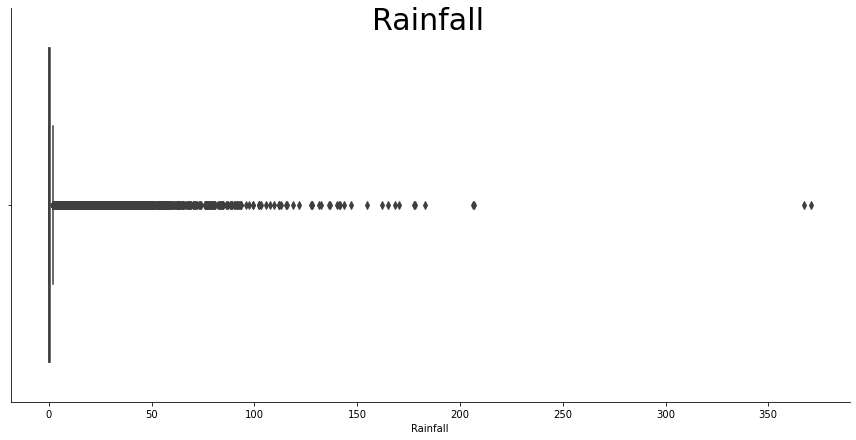

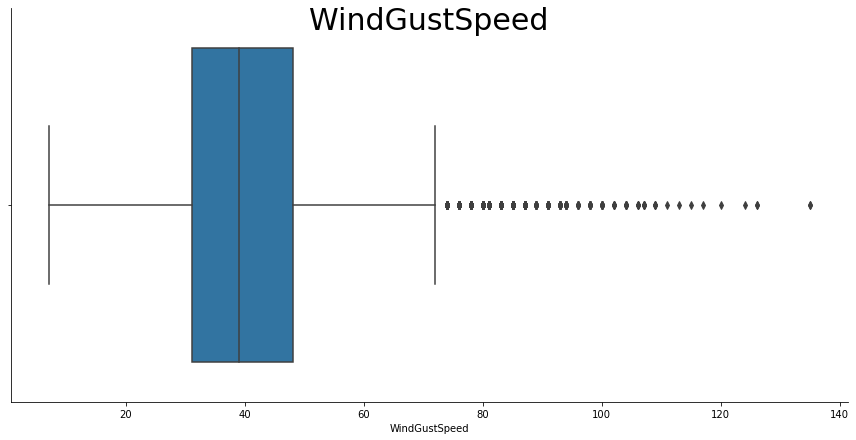

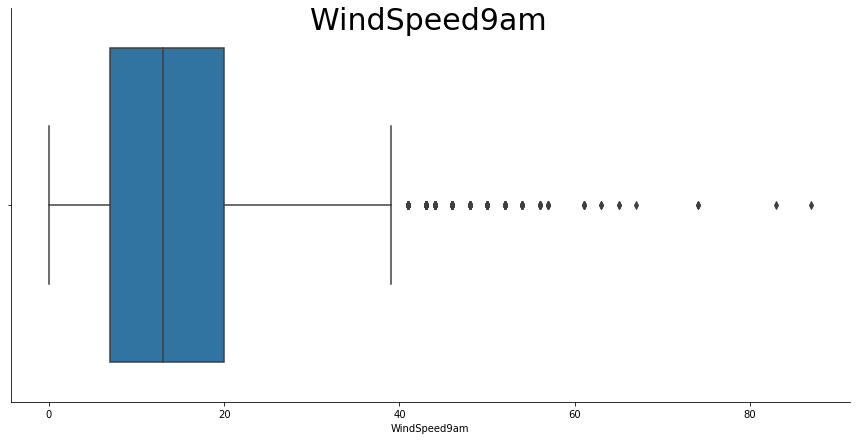

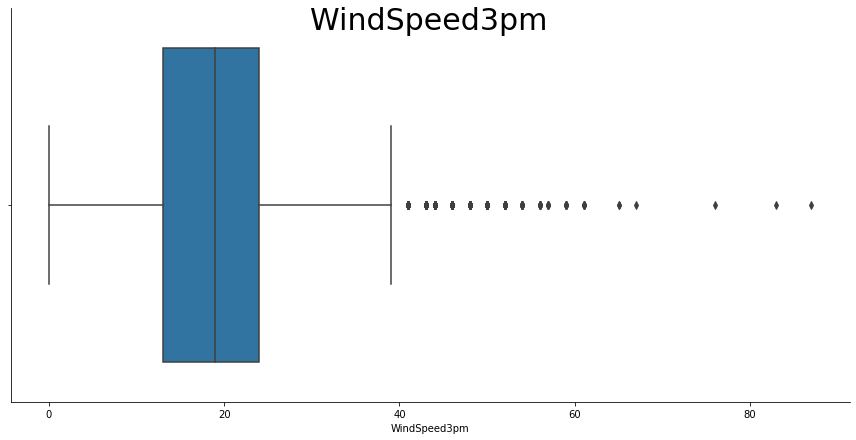

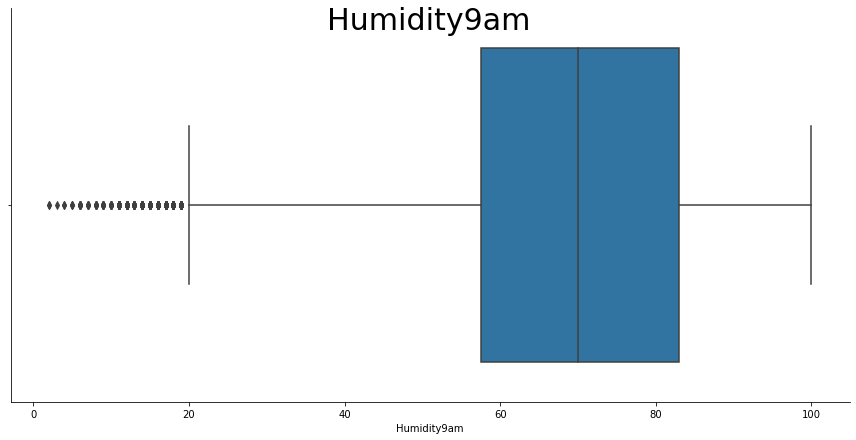

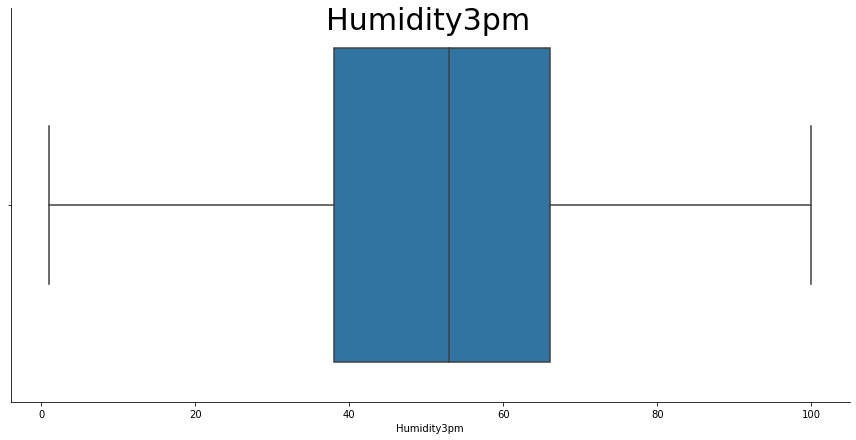

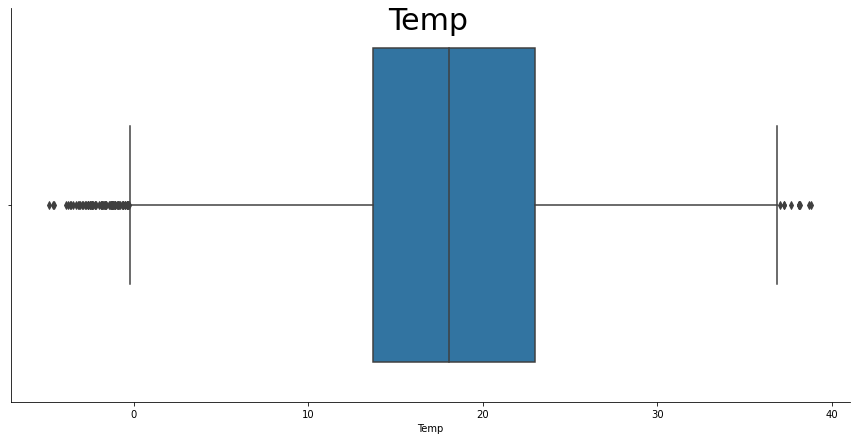

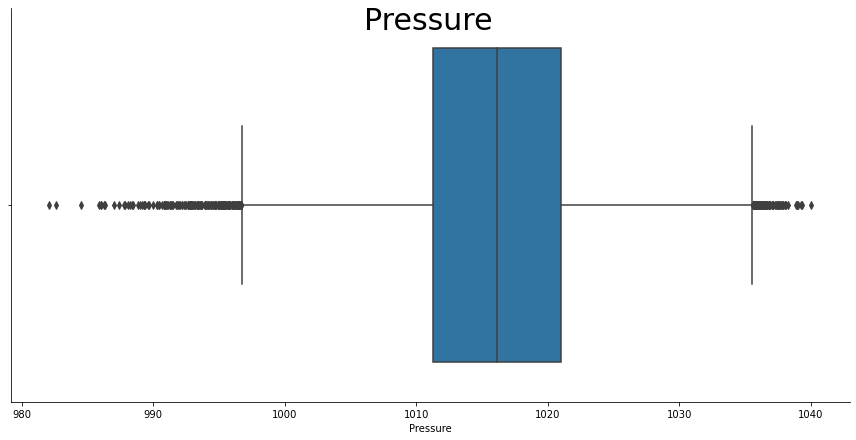

In [35]:
#boxplot for continuous columns
for i in cont:
    rel=sns.catplot(x=i,data=df5,kind="box",height=6, aspect=2)
    rel.fig.suptitle(i,fontsize=50,size=30)

# Checking contradictory values

In [36]:
df5[(df5.Rainfall==0) & (df5.RainToday=="Yes")]

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,Temp,Pressure


In [37]:
df5[(df5.Rainfall>0) & (df5.RainToday=="No")]


,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainTomorrow,Temp,Pressure
1,Launceston,0.4,SSW,50.0,E,SW,7.0,24.0,99.0,46.0,No,No,7.650,1001.95
11,Nuriootpa,1.0,WSW,65.0,WNW,W,15.0,37.0,39.0,96.0,No,Yes,21.725,1006.20
35,Walpole,0.2,SE,39.0,SSE,SE,20.0,17.0,68.0,68.0,No,No,13.175,1036.25
58,Dartmoor,0.2,E,37.0,NaN,E,0.0,13.0,98.0,76.0,No,No,8.925,1031.75
67,Sydney,0.4,NaN,NaN,SSE,ESE,22.0,19.0,54.0,47.0,No,No,20.050,1019.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36145,MountGinini,1.0,W,44.0,WSW,WSW,15.0,26.0,75.0,56.0,No,No,7.250,NaN
36148,Hobart,0.6,NW,61.0,NNW,NW,19.0,15.0,53.0,44.0,No,No,12.375,1012.00
36161,Hobart,0.6,NNW,52.0,NNW,NNW,19.0,15.0,77.0,51.0,No,No,10.350,995.55
36167,MelbourneAirport,0.2,SSW,48.0,SW,SSE,20.0,22.0,63.0,53.0,No,No,9.075,1023.60


In [38]:
w=df5[(df5.Rainfall>0) & (df5.RainToday=="No")].index

In [39]:
df6=df5.drop(w,axis=0)

In [40]:
df6.shape

(31298, 14)

# Iterative Imputation 

In [41]:
cont

['Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp',
 'Pressure']

In [42]:
c=df6[cont]

In [43]:
c=StandardScaler().fit_transform(c)

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [45]:
imp=IterativeImputer(estimator=DecisionTreeRegressor())

In [46]:
imp.fit(c)

IterativeImputer(estimator=DecisionTreeRegressor())

In [47]:
c1=imp.transform(c)
c1

array([[-0.29651053, -0.78659116, -0.8126077 , ..., -0.20533371,
        -1.31700895,  0.95608335],
       [-0.29651053,  0.03094754,  0.51908463, ..., -0.0600325 ,
         0.72088689,  0.77684314],
       [-0.29651053,  0.99712963,  1.51785388, ..., -0.49593613,
         0.62934079,  0.08856075],
       ...,
       [-0.29651053, -0.26633926,  0.63005899, ..., -0.59280361,
         1.33384775, -0.7431138 ],
       [-0.29651053, -0.11769586, -0.59065898, ..., -0.49593613,
        -0.31796235,  0.84853923],
       [-0.29651053, -0.41498266,  0.07518719, ..., -1.12557471,
         0.1119063 ,  0.01686467]])

In [48]:
c1.shape

(31298, 8)

In [49]:
c_var=pd.DataFrame(c1,columns=cont,index=df6.index)

In [50]:
c_var

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp,Pressure
0,-0.296511,-0.786591,-0.812608,-1.467928,-0.162289,-0.205334,-1.317009,0.956083
2,-0.296511,0.030948,0.519085,1.375283,-1.082709,-0.060033,0.720887,0.776843
3,-0.296511,0.997130,1.517854,1.602740,-0.974424,-0.495936,0.629341,0.088561
4,-0.296511,0.179591,-0.923582,1.034098,-0.216431,0.763341,0.390525,0.239123
5,-0.296511,1.814668,-0.368710,-0.671829,-0.433001,1.683582,0.187531,-2.470989
...,...,...,...,...,...,...,...,...
36181,0.464202,0.402556,0.519085,-0.444372,0.866415,1.441413,-1.046351,-0.090679
36182,-0.296511,-0.266339,-0.590659,0.806641,-1.624132,-0.302201,-0.027403,0.984762
36183,-0.296511,-0.266339,0.630059,-0.671829,-0.757855,-0.592804,1.333848,-0.743114
36184,-0.296511,-0.117696,-0.590659,0.124270,-0.974424,-0.495936,-0.317962,0.848539


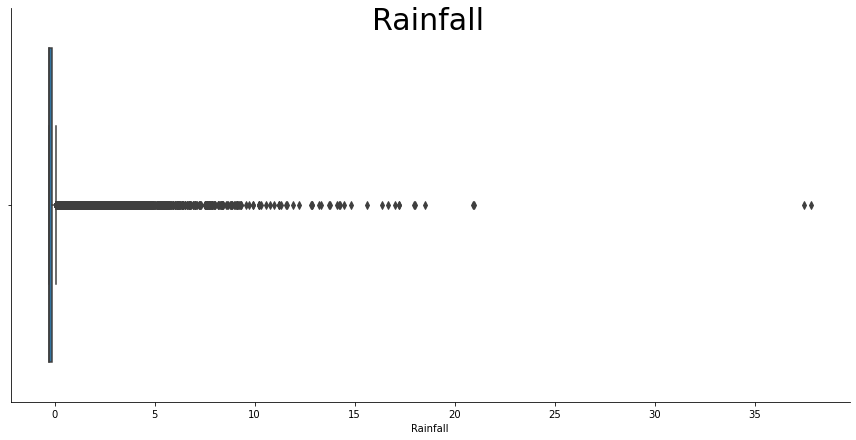

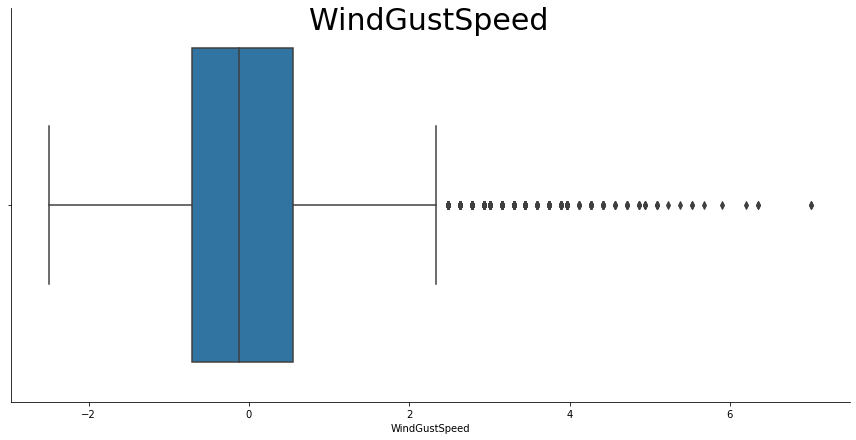

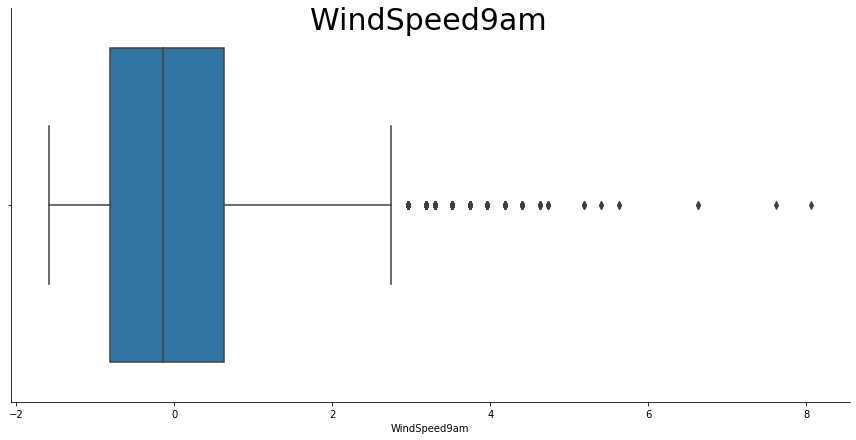

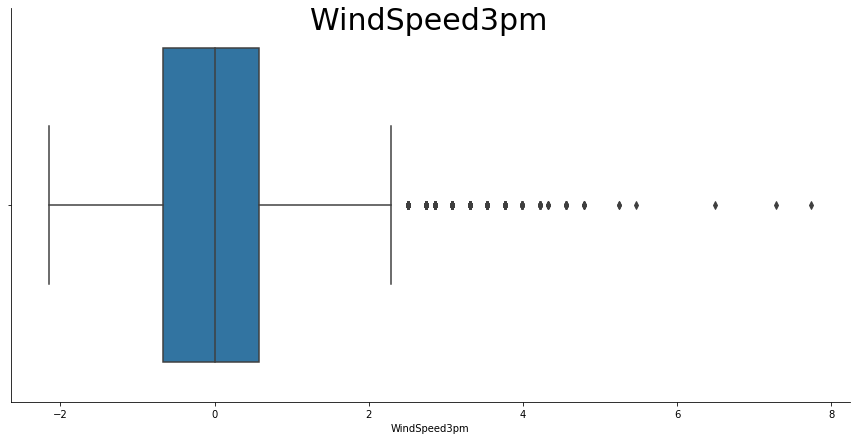

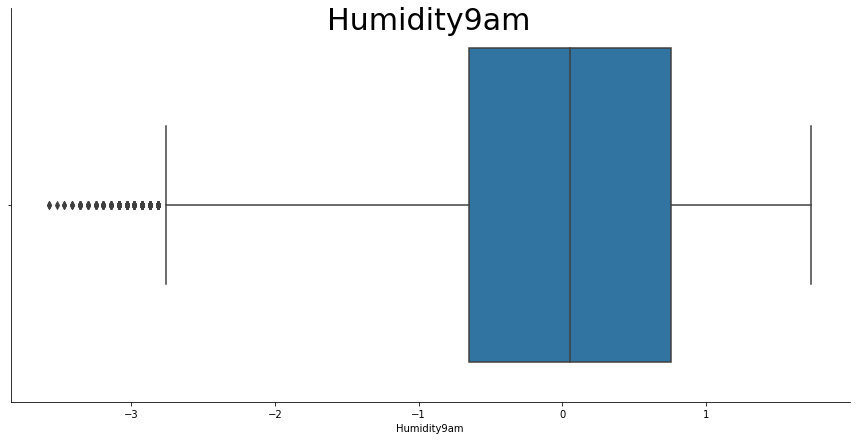

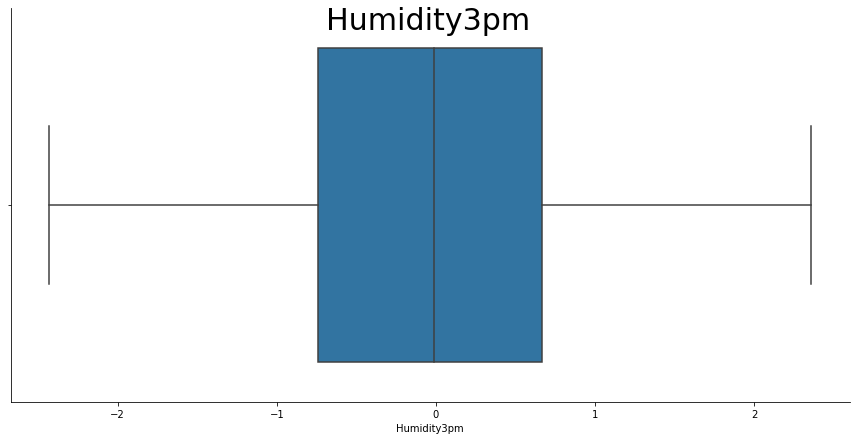

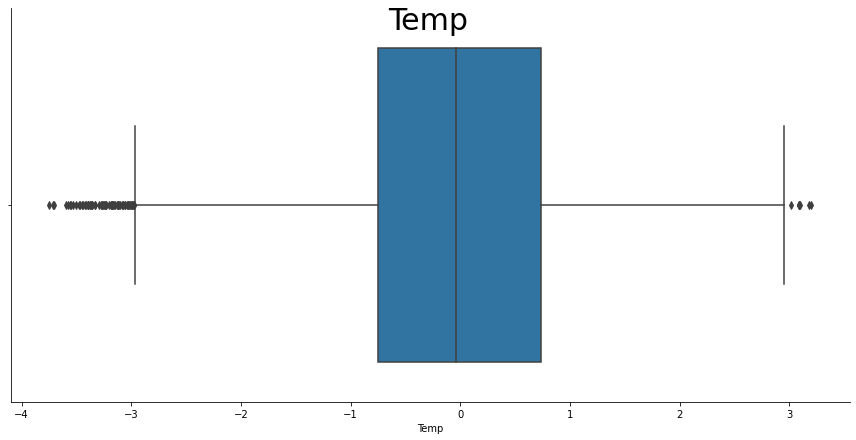

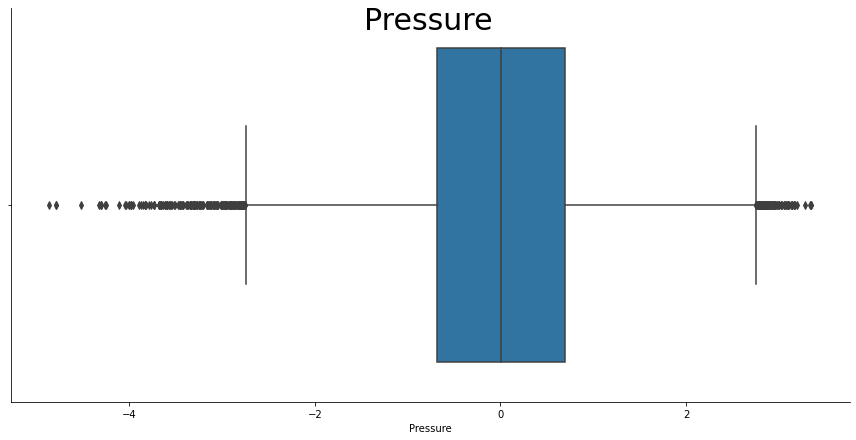

In [51]:
for i in cont:
    rel=sns.catplot(x=i,data=c_var,kind="box",height=6, aspect=2)
    rel.fig.suptitle(i,fontsize=50,size=30)

In [52]:
c_var.describe()

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp,Pressure
count,31298.000000,31298.000000,31298.000000,31298.000000,31298.000000,31298.000000,31298.000000,31298.000000
mean,0.002242,-0.011248,-0.001557,-0.000818,0.004177,0.002598,-0.000008,-0.004176
std,1.005755,1.006519,1.001197,1.001718,1.001163,1.001158,1.000043,1.007810
min,-0.296511,-2.495990,-1.589428,-2.150299,-3.573256,-2.433286,-3.752931,-4.865639
25%,-0.296511,-0.712269,-0.812608,-0.671829,-0.649570,-0.738105,-0.747831,-0.685757
50%,-0.296511,-0.117696,-0.146762,0.010542,0.054280,-0.011599,-0.043324,0.002525
75%,-0.152592,0.551199,0.630059,0.579184,0.758131,0.666474,0.732828,0.690808
max,37.841937,7.017187,8.065341,7.744076,1.732692,2.361654,3.200592,3.350732


In [53]:
c_var.skew()

Rainfall         9.896309
WindGustSpeed    0.929556
WindSpeed9am     0.792771
WindSpeed3pm     0.598534
Humidity9am     -0.435874
Humidity3pm      0.064797
Temp             0.057797
Pressure        -0.108233
dtype: float64

# Chi Square Test

In [54]:
def chi_square(crosstab):
    stat, p, dof, expected = chi2_contingency(crosstab)
    print(p)

In [55]:
winddir=["WindGustDir","WindDir9am","WindDir3pm","RainTomorrow"]
w=list(combinations(winddir,2))

In [56]:
for i in w:
    print(i)
    chi_square(pd.crosstab(df6[i[0]],df6[i[1]]))

('WindGustDir', 'WindDir9am')
0.0
('WindGustDir', 'WindDir3pm')
0.0
('WindGustDir', 'RainTomorrow')
8.448366708984105e-46
('WindDir9am', 'WindDir3pm')
0.0
('WindDir9am', 'RainTomorrow')
6.385121864977621e-74
('WindDir3pm', 'RainTomorrow')
2.2355151298910415e-31


# Imputing missing values

In [57]:
df6.isnull().sum()

Location            0
Rainfall          325
WindGustDir      2584
WindGustSpeed    2578
WindDir9am       2131
WindDir3pm        621
WindSpeed9am      397
WindSpeed3pm      367
Humidity9am       298
Humidity3pm       247
RainToday         325
RainTomorrow        0
Temp                5
Pressure         2673
dtype: int64

In [58]:
df6.skew()

Rainfall         9.957890
WindGustSpeed    0.921481
WindSpeed9am     0.792952
WindSpeed3pm     0.596512
Humidity9am     -0.436293
Humidity3pm      0.064404
Temp             0.058008
Pressure        -0.079458
dtype: float64

In [59]:
cont

['Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp',
 'Pressure']

In [60]:
df6.isna().sum()

Location            0
Rainfall          325
WindGustDir      2584
WindGustSpeed    2578
WindDir9am       2131
WindDir3pm        621
WindSpeed9am      397
WindSpeed3pm      367
Humidity9am       298
Humidity3pm       247
RainToday         325
RainTomorrow        0
Temp                5
Pressure         2673
dtype: int64

In [61]:
df6.shape

(31298, 14)

In [62]:
#categorical variables
cat=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

In [63]:
v=['WindGustDir','WindDir9am','WindDir3pm','RainToday']

In [64]:
#imputing missing categorical values based on random sampling based on probabilities of the existing features
def samp_proba(col):
    null=df6[col].isna().sum()
    x=df6[col].value_counts(normalize=True)
    l=np.random.choice(x.index,null,p=x)
    return(l)

In [65]:
d=pd.DataFrame()
for i in v:
    l=[]
    s=samp_proba(i)
    c=0
    for j in df6.loc[:,i]:
        if str(j)=="nan":
            l.append(s[c])
            c+=1
        else:
            l.append(j)
    d=pd.concat([d,pd.Series(l)],axis=1)

In [66]:
d.columns=v

In [67]:
d

,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,NW,WSW,SSE,No
1,SSE,SSE,SSE,No
2,SW,SSE,SW,No
3,NNW,WNW,N,No
4,N,ENE,SW,No
...,...,...,...,...
31293,NNE,NNE,N,Yes
31294,W,N,WSW,No
31295,E,E,ESE,No
31296,SSW,E,SSW,No


In [68]:
c_var.index=d.index
df6.index=d.index

In [69]:
d.isna().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [70]:
c1=pd.get_dummies(d,drop_first=True)
c1

,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31293,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
df9=pd.concat([c_var,c1,df6["RainTomorrow"]],axis=1)
df9

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp,Pressure,WindGustDir_ENE,WindGustDir_ESE,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow
0,-0.296511,-0.786591,-0.812608,-1.467928,-0.162289,-0.205334,-1.317009,0.956083,0,0,...,0,0,1,0,0,0,0,0,0,No
1,-0.296511,0.030948,0.519085,1.375283,-1.082709,-0.060033,0.720887,0.776843,0,0,...,0,0,1,0,0,0,0,0,0,No
2,-0.296511,0.997130,1.517854,1.602740,-0.974424,-0.495936,0.629341,0.088561,0,0,...,0,0,0,0,1,0,0,0,0,No
3,-0.296511,0.179591,-0.923582,1.034098,-0.216431,0.763341,0.390525,0.239123,0,0,...,0,0,0,0,0,0,0,0,0,No
4,-0.296511,1.814668,-0.368710,-0.671829,-0.433001,1.683582,0.187531,-2.470989,0,0,...,0,0,0,0,1,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31293,0.464202,0.402556,0.519085,-0.444372,0.866415,1.441413,-1.046351,-0.090679,0,0,...,0,0,0,0,0,0,0,0,1,Yes
31294,-0.296511,-0.266339,-0.590659,0.806641,-1.624132,-0.302201,-0.027403,0.984762,0,0,...,0,0,0,0,0,0,0,1,0,No
31295,-0.296511,-0.266339,0.630059,-0.671829,-0.757855,-0.592804,1.333848,-0.743114,0,0,...,0,0,0,0,0,0,0,0,0,No
31296,-0.296511,-0.117696,-0.590659,0.124270,-0.974424,-0.495936,-0.317962,0.848539,0,0,...,0,0,0,1,0,0,0,0,0,No


In [72]:
df9.columns

Index(['Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Temp', 'Pressure', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
       'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW',
       'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE',
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WS

In [73]:
X=df9.drop("RainTomorrow",axis=1)
y=df9.RainTomorrow

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31298 entries, 0 to 31297
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rainfall         31298 non-null  float64
 1   WindGustSpeed    31298 non-null  float64
 2   WindSpeed9am     31298 non-null  float64
 3   WindSpeed3pm     31298 non-null  float64
 4   Humidity9am      31298 non-null  float64
 5   Humidity3pm      31298 non-null  float64
 6   Temp             31298 non-null  float64
 7   Pressure         31298 non-null  float64
 8   WindGustDir_ENE  31298 non-null  uint8  
 9   WindGustDir_ESE  31298 non-null  uint8  
 10  WindGustDir_N    31298 non-null  uint8  
 11  WindGustDir_NE   31298 non-null  uint8  
 12  WindGustDir_NNE  31298 non-null  uint8  
 13  WindGustDir_NNW  31298 non-null  uint8  
 14  WindGustDir_NW   31298 non-null  uint8  
 15  WindGustDir_S    31298 non-null  uint8  
 16  WindGustDir_SE   31298 non-null  uint8  
 17  WindGustDir_SSE  

# Modelling

In [75]:
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
   

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 18,stratify=y)

In [77]:

dt=DecisionTreeClassifier()

params={'criterion':['gini','entropy'],'max_depth':list(range(6,12)),'max_leaf_nodes':list(range(10,18)),
        'min_samples_leaf':list(range(10,14))}
clf = GridSearchCV(dt, params)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 10}

In [79]:
dt1=clf.best_estimator_

In [80]:
dt1.score(x_test,y_test)

0.8334824281150159

In [81]:
print(classification_report(y_test,dt1.predict(x_test)))

              precision    recall  f1-score   support

          No       0.86      0.94      0.90      6028
         Yes       0.70      0.48      0.57      1797

    accuracy                           0.83      7825
   macro avg       0.78      0.71      0.73      7825
weighted avg       0.82      0.83      0.82      7825



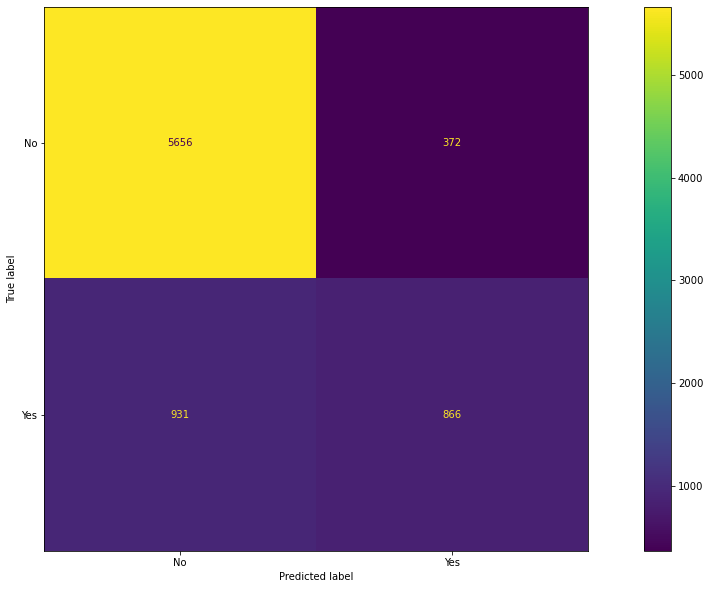

In [82]:
cm=confusion_matrix(y_test,dt1.predict(x_test),labels=dt1.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt1.classes_)
disp.plot()

In [417]:
dt1

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=16, min_samples_leaf=10)

In [83]:
#generate an array to assign weights for training as the dataset is imbalanced
weights=np.linspace(0.5,1,17)
weights

array([0.5    , 0.53125, 0.5625 , 0.59375, 0.625  , 0.65625, 0.6875 ,
       0.71875, 0.75   , 0.78125, 0.8125 , 0.84375, 0.875  , 0.90625,
       0.9375 , 0.96875, 1.     ])

In [84]:
from sklearn.metrics import precision_score

In [87]:
dt1

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15, min_samples_leaf=10)

In [88]:
acc=[]
rec=[]
pre=[]
d={"Yes":1,"No":0}
y_t=y_test.map(d)
weights=np.linspace(0.5,1,15)
for w in weights:
    dt1=DecisionTreeClassifier(max_depth=6, max_leaf_nodes=15, min_samples_leaf=10,class_weight={"No":1-w,"Yes":w})
    dt1.fit(x_train,y_train)
    acc.append(dt1.score(x_test,y_test))
    y_pred=dt1.predict(x_test)
    y_p=pd.Series(y_pred).map(d)
    recall=recall_score(y_t,y_p)
    precision=precision_score(y_t,y_p)
    rec.append(recall)  
    pre.append(precision)

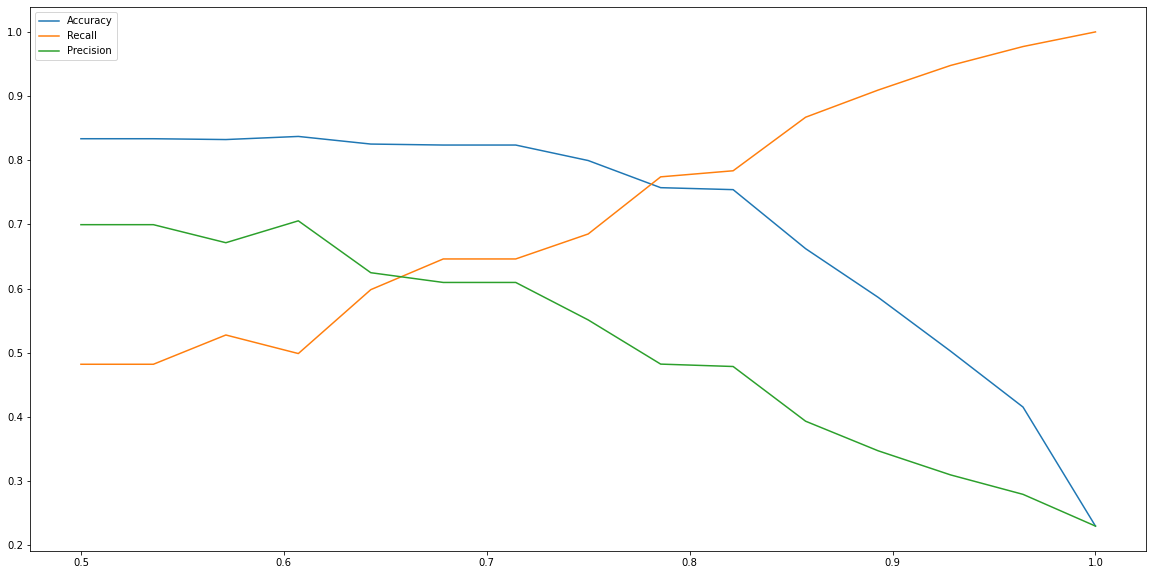

In [89]:
#checking accuracy and recall values
plt.plot(weights,acc,label="Accuracy")
plt.plot(weights,rec,label="Recall")
plt.plot(weights,pre,label="Precision")
plt.legend()

In [90]:
for i in range(len(pre)):
    print(pre[i]-rec[i])

0.21760104572060956
0.21760104572060956
0.14384219213325322
0.20690301859179122
0.026417584734322208
-0.03662797576012511
-0.03662797576012511
-0.13400106314662508
-0.2919188441355659
-0.30510472488693074
-0.4738640437401558
-0.5622244475239342
-0.6382230322894651
-0.6980552815599783
-0.7703514376996805


In [91]:
weights[2:6]

array([0.57142857, 0.60714286, 0.64285714, 0.67857143])

In [92]:
w= weights[2:6].mean()

In [93]:
dt1

DecisionTreeClassifier(class_weight={'No': 0.0, 'Yes': 1.0}, max_depth=6,
                       max_leaf_nodes=15, min_samples_leaf=10)

In [94]:
dt1=DecisionTreeClassifier(max_depth=6,max_leaf_nodes=15, min_samples_leaf=10,class_weight={'No': 1-w, 'Yes': w})

In [95]:
score=cross_val_score(dt1,X,y,cv=6,scoring="accuracy")

In [96]:
score

array([0.82940387, 0.82882883, 0.82707055, 0.82898773, 0.8211273 ,
       0.8318635 ])

In [97]:
dt1

DecisionTreeClassifier(class_weight={'No': 0.375, 'Yes': 0.625}, max_depth=6,
                       max_leaf_nodes=15, min_samples_leaf=10)

In [98]:
x_train.shape

(23473, 54)

# AdaBoostClassifier

In [99]:
from sklearn.ensemble import AdaBoostClassifier
dt1
acc=[]
rec=[]
pre=[]
d={"Yes":1,"No":0}
y_t=y_test.map(d)
for i in range(50,1000,50):
    ad=AdaBoostClassifier(base_estimator=dt1,n_estimators=i)
    ad.fit(x_train,y_train)
    acc.append(ad.score(x_test,y_test))
    y_pred=ad.predict(x_test)
    y_p=pd.Series(y_pred).map(d)
    recall=recall_score(y_t,y_p)
    precision=precision_score(y_t,y_p)
    rec.append(recall)  
    pre.append(precision)

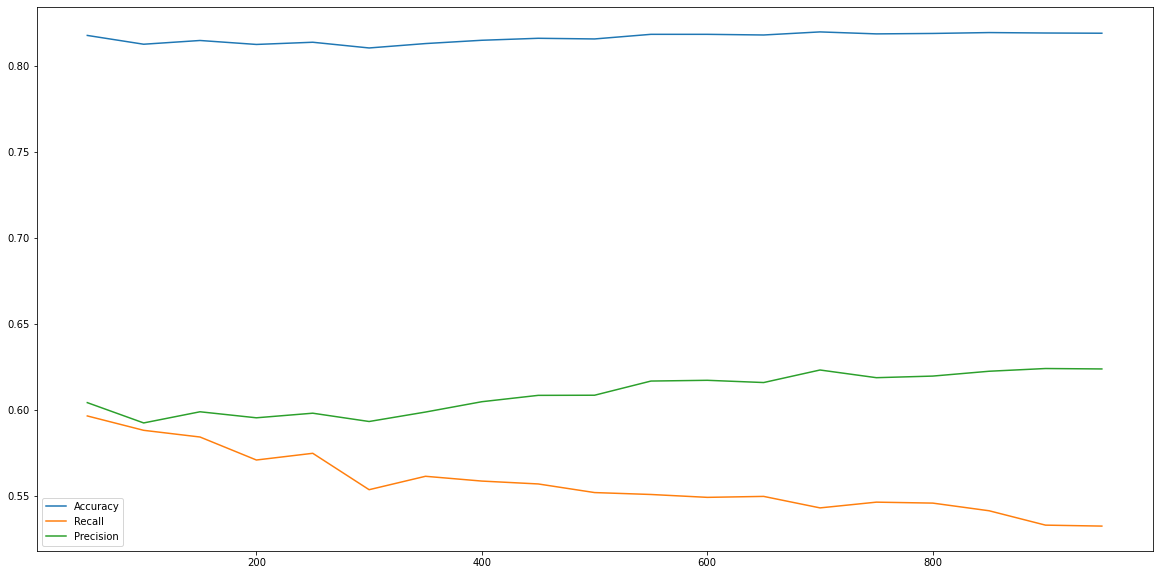

In [100]:
plt.plot(range(50,1000,50),acc,label="Accuracy")
plt.plot(range(50,1000,50),rec,label="Recall")
plt.plot(range(50,1000,50),pre,label="Precision")
plt.legend()

# KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
acc=[]
rec=[]
pre=[]
d={"Yes":1,"No":0}
y_t=y_test.map(d)
for i in range(2,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    acc.append(knn.score(x_test,y_test))
    y_pred=knn.predict(x_test)
    y_p=pd.Series(y_pred).map(d)
    recall=recall_score(y_t,y_p)
    precision=precision_score(y_t,y_p)
    rec.append(recall)  
    pre.append(precision)

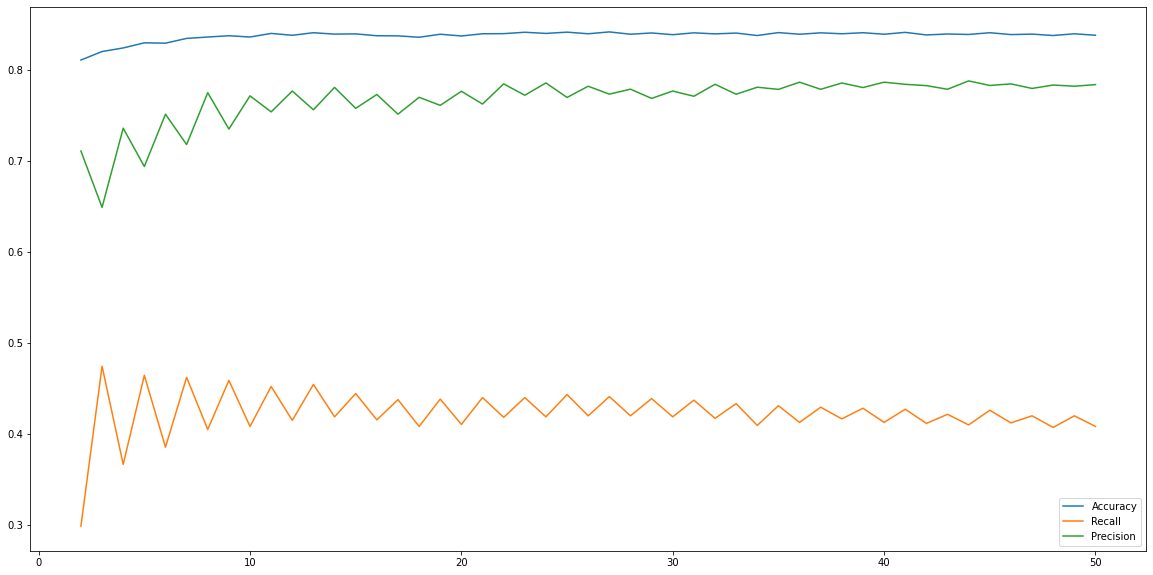

In [105]:
plt.plot(range(2,51),acc,label="Accuracy")
plt.plot(range(2,51),rec,label="Recall")
plt.plot(range(2,51),pre,label="Precision")
plt.legend()

# Stacking ensemble

In [110]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier 

In [120]:
w

0.625

In [122]:
dt1=DecisionTreeClassifier(max_depth=6,max_leaf_nodes=15, min_samples_leaf=10,class_weight={0: 1-w, 1: w})

In [123]:
estimators = [('ada', AdaBoostClassifier(base_estimator=dt1,n_estimators=100)),
        ('knn',KNeighborsClassifier(n_neighbors=5))]
stack = StackingClassifier(estimators=estimators,final_estimator=RandomForestClassifier(n_estimators=10))

In [124]:
y_t1=y_train.map(d)
y_t2=y_test.map(d)

In [125]:
stack.fit(x_train, y_t1)

StackingClassifier(estimators=[('ada',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.375,
                                                                                                       1: 0.625},
                                                                                         max_depth=6,
                                                                                         max_leaf_nodes=15,
                                                                                         min_samples_leaf=10),
                                                   n_estimators=100)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier(n_estimators=10))

In [126]:
stack.score(x_test,y_t2)

0.7683067092651757

In [128]:
y_pred=stack.predict(x_test)

In [129]:
precision_score(y_t2,y_pred)

0.4951980792316927

In [130]:
recall_score(y_t2,y_pred)

0.4590984974958264